In [0]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import cv2
import keras
import pickle
import matplotlib.pyplot as plt

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp9fasd6z7/pubring.gpg' created
gpg: /tmp/tmp9fasd6z7/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
^C


KeyboardInterrupt: ignored

In [37]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!git clone https://github.com/salathegroup/plantvillage_deeplearning_paper_dataset.git


Cloning into 'plantvillage_deeplearning_paper_dataset'...
remote: Counting objects: 163224, done.
remote: Total 163224 (delta 0), reused 0 (delta 0), pack-reused 163224
Receiving objects: 100% (163224/163224), 2.00 GiB | 41.44 MiB/s, done.
Resolving deltas: 100% (134/134), done.
Checking out files: 100% (182401/182401), done.


In [0]:
import os
PATH = os.getcwd()
# Define data path
data_path = 'plantvillage_deeplearning_paper_dataset/raw/segmented'
data_dir_list = os.listdir(data_path)
data_dir_list

['Grape___Esca_(Black_Measles)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Apple___Cedar_apple_rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Tomato___Bacterial_spot',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Cherry_(including_sour)___Powdery_mildew',
 'Pepper,_bell___Bacterial_spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Blueberry___healthy',
 'Soybean___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Leaf_Mold',
 'Tomato___Target_Spot',
 'Tomato___healthy',
 'Strawberry___Leaf_scorch',
 'Peach___Bacterial_spot',
 'Apple___Black_rot',
 'Grape___healthy',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Late_blight',
 'Potato___healthy',
 'Raspber

In [0]:
crops=['maize','Potato','Apple','Peach']


In [0]:
img_data_list=[]
label=[]
classes={}
l=-1
for dataset in data_dir_list:
  if any(x in dataset for x in crops):
    img_list=os.listdir(data_path+'/'+ dataset)
    l=l+1
    classes[l]=dataset
    print('l=',l)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
      input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
      input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
      input_img_resize=cv2.resize(input_img,(128,128))
      img_data_list.append(input_img_resize)
      label.append(l)


l= 0
Loaded the images of dataset-Potato___Early_blight

l= 1
Loaded the images of dataset-Corn_(maize)___healthy

l= 2
Loaded the images of dataset-Apple___Cedar_apple_rust

l= 3
Loaded the images of dataset-Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot

l= 4
Loaded the images of dataset-Corn_(maize)___Common_rust_

l= 5
Loaded the images of dataset-Peach___healthy

l= 6
Loaded the images of dataset-Apple___Apple_scab

l= 7
Loaded the images of dataset-Potato___Late_blight

l= 8
Loaded the images of dataset-Corn_(maize)___Northern_Leaf_Blight

l= 9
Loaded the images of dataset-Peach___Bacterial_spot

l= 10
Loaded the images of dataset-Apple___Black_rot

l= 11
Loaded the images of dataset-Potato___healthy

l= 12
Loaded the images of dataset-Apple___healthy



In [0]:
print(len(img_data_list),len(label))
print(classes)

11832 11832
{0: 'Potato___Early_blight', 1: 'Corn_(maize)___healthy', 2: 'Apple___Cedar_apple_rust', 3: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 4: 'Corn_(maize)___Common_rust_', 5: 'Peach___healthy', 6: 'Apple___Apple_scab', 7: 'Potato___Late_blight', 8: 'Corn_(maize)___Northern_Leaf_Blight', 9: 'Peach___Bacterial_spot', 10: 'Apple___Black_rot', 11: 'Potato___healthy', 12: 'Apple___healthy'}


In [0]:

with open("drive/Colab Notebooks/abc/crops_imgs.txt",'wb') as f:
  pickle.dump(img_data_list,f)
  
with open("drive/Colab Notebooks/abc/labels.txt",'wb') as f:
  pickle.dump(label,f)
  
with open("drive/Colab Notebooks/abc/label_dict.txt",'wb') as f:
  pickle.dump(classes,f)

In [0]:
'''with open("drive/Colab Notebooks/abc/crops_imgs.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  img_data_list=unpickler.load()
  
with open("drive/Colab Notebooks/abc/labels.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  label=unpickler.load()
  


with open("drive/Colab Notebooks/abc/label_dict.txt",'rb') as f:
  unpickler = pickle.Unpickler(f)
  classes=unpickler.load()
  '''


In [7]:
img_data_list

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
 

In [0]:
import numpy as np
data=np.asarray(img_data_list)

label=np.asarray(label)

In [9]:
data.shape

(11832, 128, 128)

In [0]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(data,label,test_size=0.33,random_state=5)

In [11]:
train_data[0].shape
#type(train_data[0])

(128, 128)

In [0]:
# input image dimensions
img_x, img_y = 128,128
x_train = train_data.reshape(train_data.shape[0], img_x, img_y, 1)
x_test = test_data.reshape(test_data.shape[0], img_x, img_y, 1)

input_shape = (img_x, img_y, 1)


In [13]:
y_test.shape

NameError: ignored

In [14]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (7927, 128, 128, 1)
7927 train samples
3905 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
num_classes=13
y_train=train_label
y_test=test_label
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:
y_train[-1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [0]:
history = AccuracyHistory()

In [0]:
model.fit(x_train, y_train,
          batch_size=150,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
model.save('drive/Colab Notebooks/abc/leafmodel.h5')

In [0]:
'''from keras.models import load_model
model = load_model('drive/Colab Notebooks/abc/leafmodel.h5')
'''

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3754198804554958
Test accuracy: 0.7979513444302176


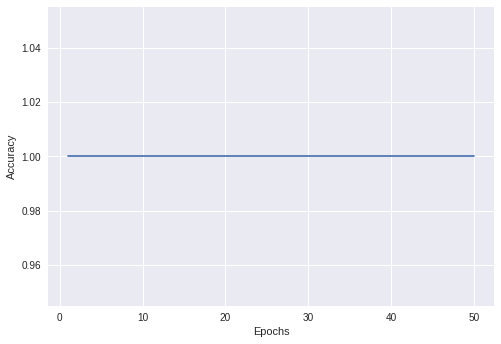

In [0]:
plt.plot(range(1, 51), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [0]:
# input image dimensions
img_x, img_y = 128,128
input_img=cv2.imread('drive/Colab Notebooks/abc/Apple___Apple_scab/fed05dda-1d4d-4de4-bbf2-517640b3c999___FREC_Scab 3446_final_masked.jpg')
input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
input_img_resize=cv2.resize(input_img,(128,128))
input_img=input_img_resize.reshape(1,img_x,img_y,1)
input_img = input_img.astype('float32')
input_img /= 255



In [60]:
ans=model.predict_classes(input_img)
classes[ans[0]]

'Apple___Apple_scab'

'Apple___Black_rot'